# GRIP - The Spark Foundation Task - 3

### Task 3 - Exploratory Data Analysis - Retail

### Name- Sanket Shivade 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
import statsmodels

### Import Datasets

In [2]:
df = pd.read_csv('D:\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Checking info of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Univariate Analysis

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Handling Null Values

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Finding and Treatment of Outliers

<AxesSubplot:>

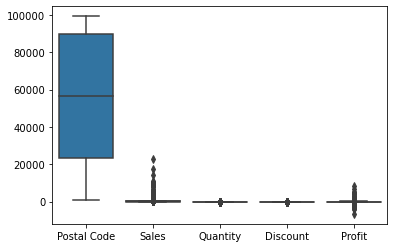

In [7]:
sns.boxplot(data = df)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

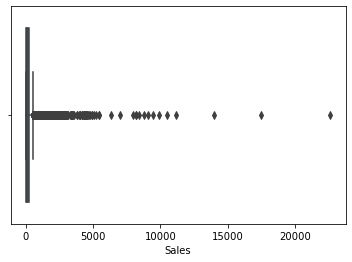

In [8]:
sns.boxplot(df['Sales'])

In [9]:
q1=df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
IQR=q3-q1
# lower_limit=q1-1.5 * IQR
upper_limit = q3 + 1.5 *IQR
upper_limit

498.93

In [10]:
df['Sales']=np.where(df['Sales'] > upper_limit,upper_limit,df['Sales'])

<AxesSubplot:ylabel='Quantity'>

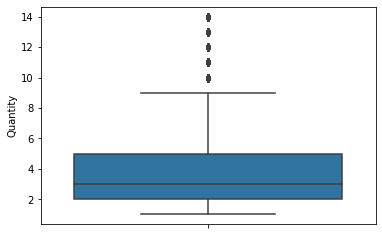

In [11]:
sns.boxplot(y = 'Quantity',data=df)

In [12]:
q1 = df['Quantity'].quantile(0.25)
q3 =  df['Quantity'].quantile(0.75)
IQR = q3-q1
# lower_limit = q1 - 1.5* IQR
upper_limit = q3 + 1.5 * IQR
upper_limit

9.5

In [13]:
 df['Quantity']=np.where( df['Quantity'] > upper_limit,upper_limit, df['Quantity'])

<AxesSubplot:ylabel='Discount'>

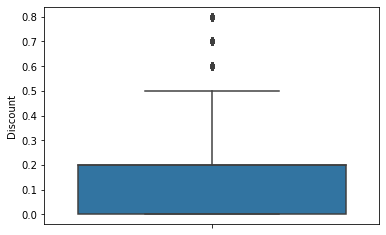

In [14]:
sns.boxplot(y = 'Discount',data=df)

In [15]:
q1 = df['Discount'].quantile(0.25)
q3 =  df['Discount'].quantile(0.75)
IQR = q3-q1
# lower_limit = q1 - 1.5* IQR
upper_limit = q3 + 1.5 * IQR
upper_limit

0.5

In [16]:
 df['Discount']=np.where( df['Discount'] > upper_limit,upper_limit, df['Discount'])

<AxesSubplot:ylabel='Profit'>

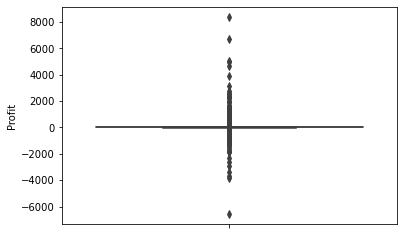

In [17]:
sns.boxplot(y= 'Profit',data=df)

In [18]:
q1 = df['Profit'].quantile(0.25)
q3 =  df['Profit'].quantile(0.75)
IQR = q3-q1
lower_limit = q1 - 1.5* IQR
upper_limit = q3 + 1.5 * IQR
upper_limit

70.816875

In [19]:
 df['Profit']=np.where( df['Profit'] > upper_limit,upper_limit, df['Profit'])

In [20]:
 df['Profit']=np.where( df['Profit'] < lower_limit,lower_limit, df['Profit'])

<AxesSubplot:>

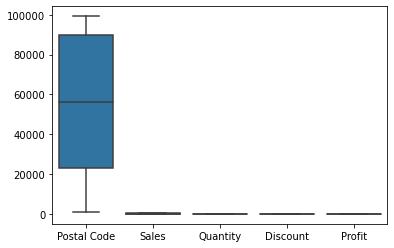

In [21]:
sns.boxplot(data=df)

### Checking Duplicates Values and Remove Them

In [22]:
duplicate_row_df = df[df.duplicated()]
print('No of duplicate rows',duplicate_row_df.shape)

No of duplicate rows (21, 13)


In [23]:
df = df.drop_duplicates()

In [24]:
df.shape

(9973, 13)

In [25]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2.0,0.00,41.913600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,498.930,3.0,0.00,70.816875
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2.0,0.00,6.871400
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,498.930,5.0,0.45,-39.724125
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2.0,0.20,2.516400


### Visualization and Analysis of The Data

In [26]:
df.sort_values('Profit',ascending = False)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2.0,0.0,70.816875
5188,Standard Class,Consumer,United States,Columbus,Indiana,47201,Central,Furniture,Chairs,498.930,7.0,0.0,70.816875
5062,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Technology,Phones,377.970,3.0,0.0,70.816875
5064,First Class,Consumer,United States,Wilmington,Delaware,19805,East,Technology,Phones,391.980,2.0,0.0,70.816875
5065,Standard Class,Consumer,United States,Burlington,North Carolina,27217,South,Technology,Accessories,383.976,3.0,0.2,70.816875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,498.930,4.0,0.5,-39.724125
6947,Standard Class,Consumer,United States,Aurora,Illinois,60505,Central,Office Supplies,Storage,221.024,2.0,0.2,-39.724125
6936,First Class,Home Office,United States,Chicago,Illinois,60653,Central,Furniture,Furnishings,84.272,2.0,0.5,-39.724125
2091,Standard Class,Consumer,United States,Wilmington,Delaware,19805,East,Furniture,Tables,310.443,3.0,0.3,-39.724125


### From the above table we can conclude that the company making profit in :

##### California , indiana , Minnesota and north California

### From the above table we can conclude that the company loosing money in :
###### Pennsylvania , Delaware and Arizona

In [27]:
df.groupby('Region').sum(['Profit']).sort_values('Profit')

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151462535,310709.9554,8707.0,453.34,23347.406300
South,55875052,228363.2555,6139.5,212.15,29797.785075
East,50079279,398186.2000,10499.5,376.20,43761.323850
West,292693454,461708.9645,12096.0,329.80,63459.427650


<AxesSubplot:xlabel='Region', ylabel='Profit'>

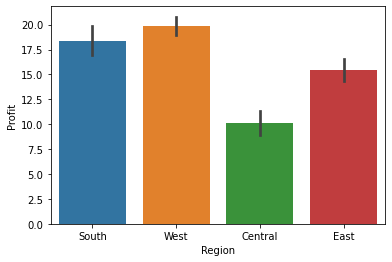

In [28]:
sns.barplot(x='Region',y='Profit',data=df)

#### Here the company makes less profit in central region and makes more profit in south, east and west region. 

In [29]:
df.groupby('Category').sum( ['Profit']).sort_values('Profit')

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,117845732,478687.7364,7921.5,351.19,24300.559700
Technology,102593730,427488.4230,6862.5,239.80,54629.410900
Office Supplies,329670858,492792.2160,22658.0,780.50,81435.972275


<AxesSubplot:xlabel='Category', ylabel='Profit'>

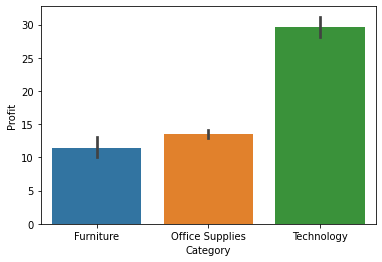

In [30]:
sns.barplot(x = 'Category',y = 'Profit',data=df)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

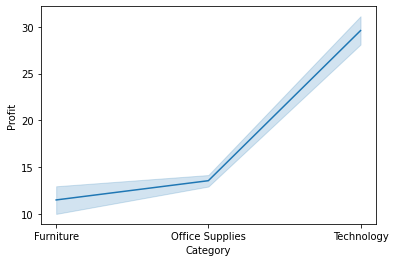

In [31]:
sns.lineplot(data=df,x='Category',y='Profit')

### Here the company makes more profit from the category technology ,office supply and less profit from furniture.

In [32]:
df.groupby(['Region','Category']).sum( ['Profit']).sort_values('Profit')

Postal Code        Sales  Quantity  Discount  \
Region  Category                                                        
Central Furniture           31390104  108361.0434    1807.0    128.94   
East    Furniture           10354402  131862.6760    2179.5     92.20   
South   Furniture           11471303   74046.9505    1272.0     40.35   
        Technology          10331576   68180.1750    1100.0     31.60   
Central Office Supplies     92607360  108473.2550    5363.0    268.50   
West    Furniture           64629923  164417.0665    2663.0     89.70   
Central Technology          27465071   93875.6570    1537.0     55.90   
East    Technology           9962557  123514.0030    1917.0     73.70   
South   Office Supplies     34072173   86136.1300    3767.5    140.20   
West    Technology          54834526  141918.5880    2308.5     78.60   
East    Office Supplies     29762320  142809.5210    6403.0    210.30   
West    Office Supplies    173229005  155373.3100    7124.5    161.50   

                               Profit  
Region  Category                       
Central Furniture        -1031.821550  
East    Furniture         6350.308075  
South   Furniture         6970.043625  
        Technology        9575.687625  
Central Office Supplies  11522.969450  
West    Furniture        12012.029550  
Central Technology       12856.258400  
East    Technology       13085.230175  
South   Office Supplies  13252.053825  
West    Technology       19112.234700  
East    Office Supplies  24325.785600  
West    Office Supplies  32335.163400

### Here the compny getting loss from central region and from the furniture category.

In [33]:
df.groupby('Segment').sum( ['Profit']).sort_values('Profit')

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Home Office,97903137,250900.2358,6664.5,230.93,30686.867500
Corporate,164098282,430526.9658,11487.5,420.15,49245.488550
Consumer,288108901,717541.1738,19290.0,720.41,80433.586825


In [34]:
data= df.groupby('Segment')['Profit'].sum()
data

Segment
Consumer       80433.586825
Corporate      49245.488550
Home Office    30686.867500
Name: Profit, dtype: float64

<AxesSubplot:ylabel='Profit'>

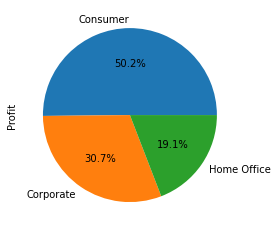

In [35]:
data.plot.pie(autopct="%.1f%%")

#### Here the company make profit from the consumer and less profit from the home office

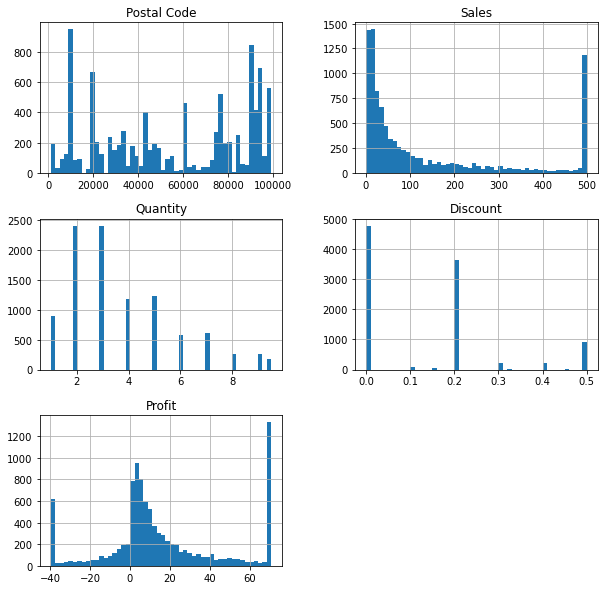

In [36]:
df.hist(figsize=(10,10),bins=50)
plt.show()

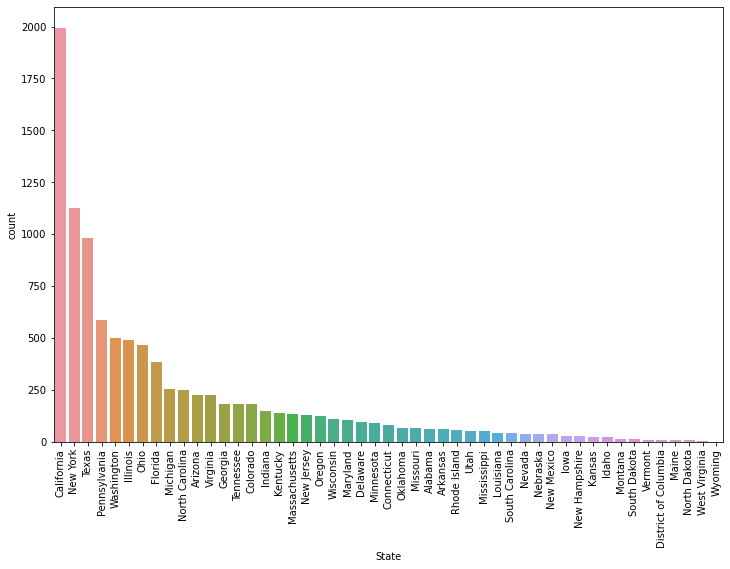

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

## Conclusion :

From the above result we can say that the company needs to do more analysis why they loosing in the following states: Pennsylvania , Delaware, Arizona

The Company needs to enhance its marketing strategy towards Central region and also Consumer segments.

The Technology and office supplies are more profitable category and needs to work on furniture category

## Thank You....!